Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

Checking versions of the libraries

In [ ]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.19.5
1.1.5
2.6.0


Loading the dataset

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

Checking the shape of dataset

In [ ]:
dataset.shape

(10000, 14)

***Exploratory Data Analysis***

Checking the columns present in dataset

In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Checking the data types of the columns

In [ ]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Checking for null value

In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Statistical description of the dataset

In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Checking the exited percentage

Exited Percentages are
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


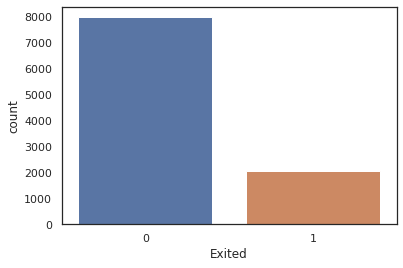

In [ ]:
sns.countplot(dataset.Exited);
print ('Exited Percentages are\n',dataset.Exited.value_counts() / dataset.Exited.count())

In the above plot we can see around 79.63% customers has not exited and 20.37% has exited the firm.

In [ ]:
counts = dataset['Exited'].value_counts()
counts

0    7963
1    2037
Name: Exited, dtype: int64

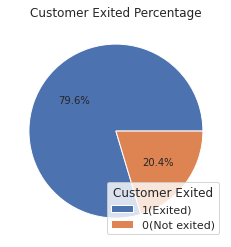

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, autopct='%1.1f%%')
ax.legend(labels=['1(Exited)', '0(Not exited)'], title='Customer Exited',loc='lower right')
ax.set_title("Customer Exited Percentage")
plt.show()

The above pie chart represents the % of the customers exited and not exited.

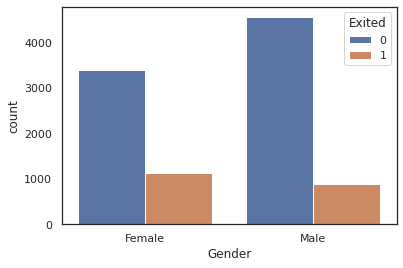

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=dataset);

The above count plot shows the relation between gender and exited column. We can see that a slightly more female customers have exited than male customers, but there is a huge difference in the number of male customers and the female customers who have stayed .

Checking the geography column

In [ ]:
counts_geography = dataset['Geography'].value_counts()
counts_geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

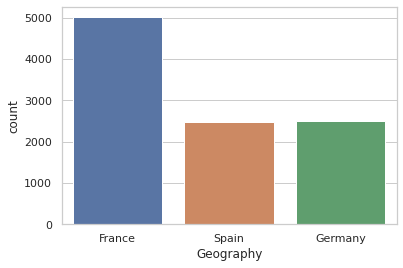

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x="Geography", data = dataset)

The count plot shows the most number of customers are from France and Spain and Germany has almost equal number of customers.

Checking the IsActiveMember column

In [ ]:
counts_IsActiveMember = dataset['IsActiveMember'].value_counts()
counts_IsActiveMember

1    5151
0    4849
Name: IsActiveMember, dtype: int64

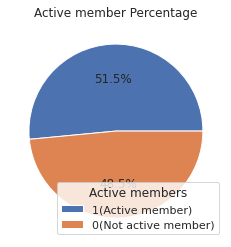

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts_IsActiveMember, autopct='%1.1f%%')
ax.legend(labels=['1(Active member)', '0(Not active member)'], title='Active members',loc='lower right')
ax.set_title("Active member Percentage")
plt.show()

We can see from the above pie chart there is a difference of only 3% between the active and non-active members.

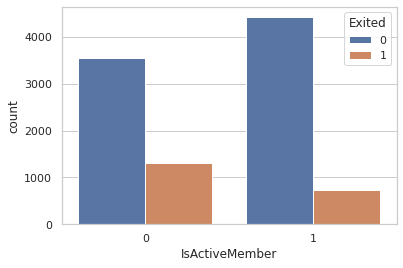

In [ ]:
sns.countplot(x='IsActiveMember', hue='Exited', data=dataset);

In the above count plot, We can see there are more active members than the non-active members who have not exited the firm.

Also we can see that there are less active customers than the non-active customers who have exited the firm.

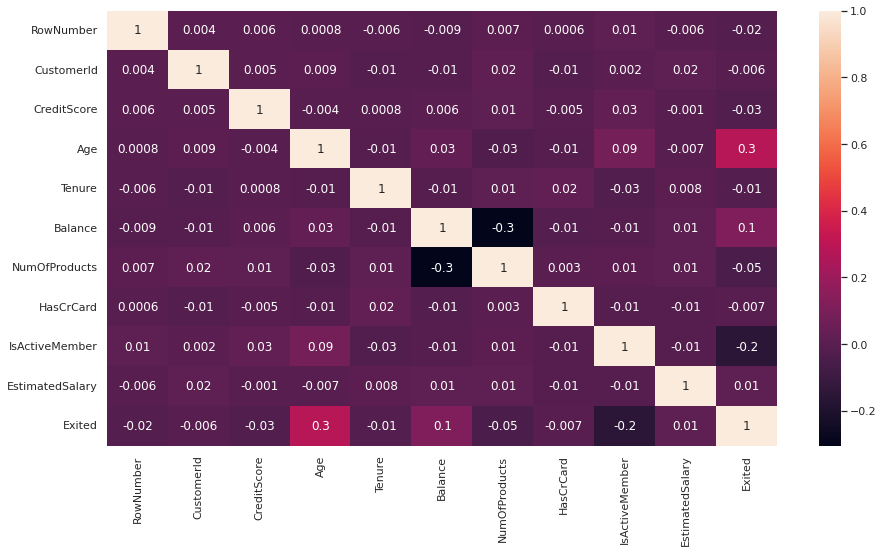

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=dataset.corr(), annot=True, fmt='.1g')

In the above heatmap, which represents the correlation between the columns, there appears to be very less correlation among all the columns. And no multicollinearity which is good.

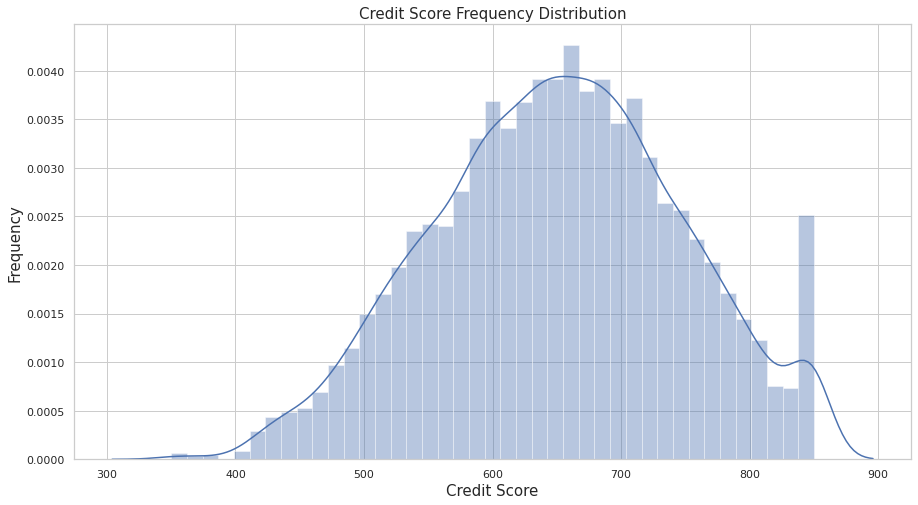

In [ ]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

In the above plot, most of the distributions are between 600 and 700. And the distribution is normal (i.e. not skewed).

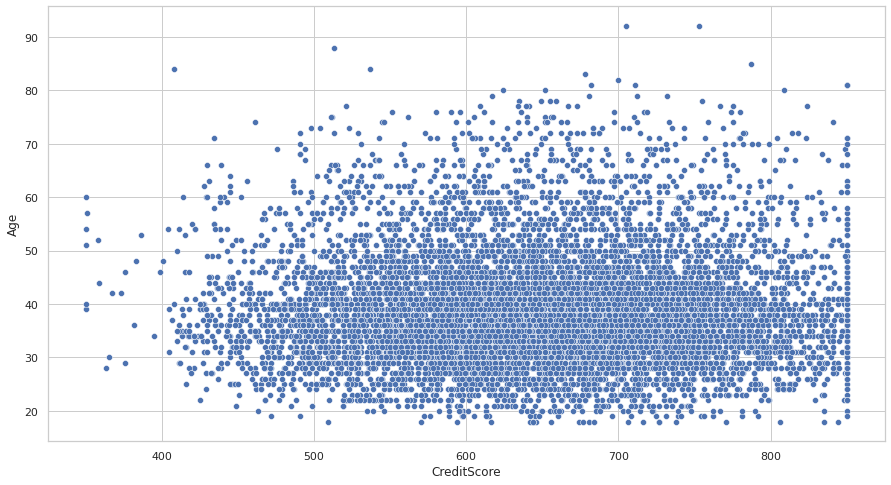

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CreditScore', data=dataset, y='Age')

In the above scatter plot, we can say there appears to be no correlation among age and credit score.

Visualizing the count of each tenure.

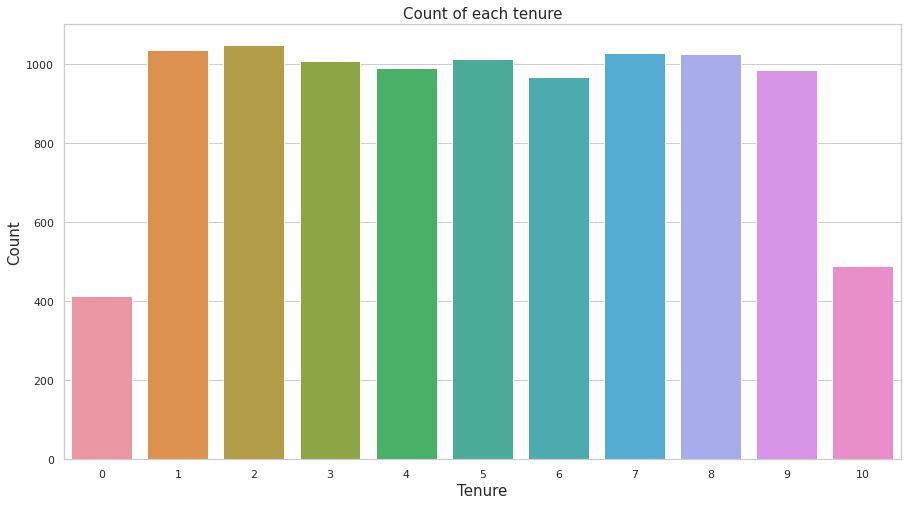

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=dataset.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15);

We can see that almost all the people have similar years of tenure mostly. However, there are a few people with less than a year or 10 years.


Checking which country has most credit cards.

<Figure size 1080x576 with 0 Axes>

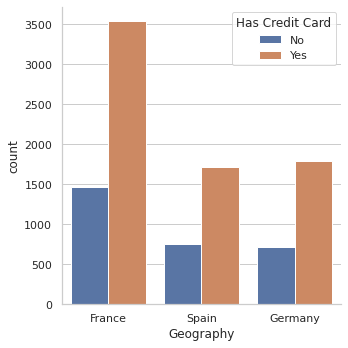

In [ ]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='HasCrCard', data=dataset, legend=False)
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show();

We can see in each country, there are more people with a credit card then there are without.

Reviewing the 'Status' relation with categorical variables

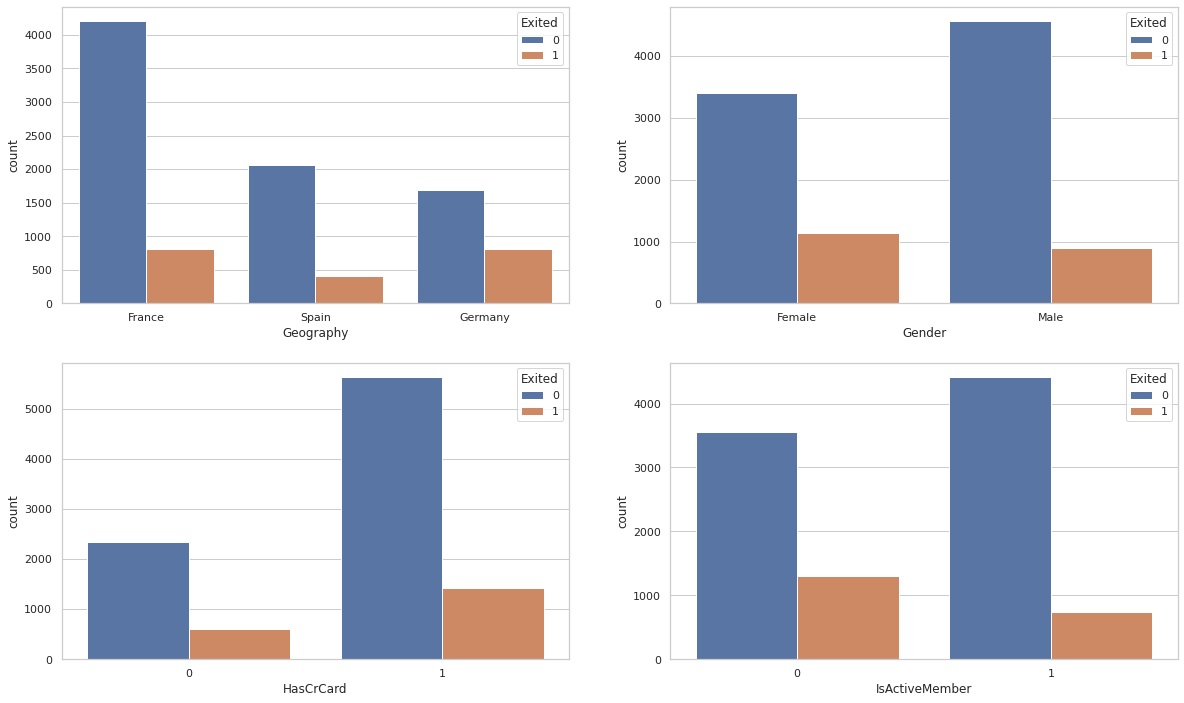

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

We conclude the following:


*   Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

*   The proportion of female customers churning is also greater than that of male customers.

*   Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

*   Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


Relations based on the continuous data attributes

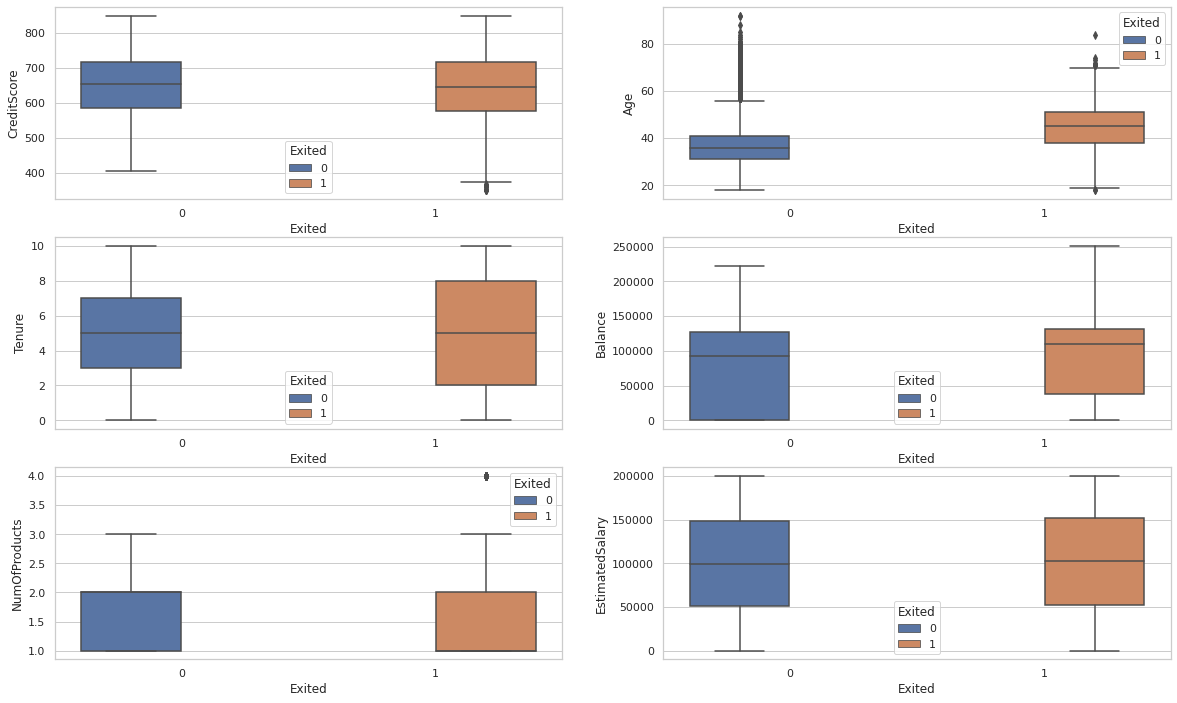

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

We Conclude the following:

*   There is no significant difference in the credit score distribution between retained and churned customers.

*   The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.

*   With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

*   Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

*   Neither the product nor the salary has a significant effect on the likelihood to churn.







***ANN-Model***




In [ ]:
#Splitting the dataset into x and y
x= dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [ ]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
#Splitting dataset into training and testing parts to train and validate the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#Building the ANN model
ann= tf.keras.models.Sequential()
#Hidden layer 1
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))
#Hidden layer 2
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))
#Hidden layer 3
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))
#Output layer 
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=16,epochs=300)

Epoch 1/300
500/500 [==============================] - 2s 1ms/step - loss: 0.5235 - accuracy: 0.7725
Epoch 2/300
500/500 [==============================] - 1s 1ms/step - loss: 0.4458 - accuracy: 0.8046
Epoch 3/300
500/500 [==============================] - 1s 1ms/step - loss: 0.4272 - accuracy: 0.8112
Epoch 4/300
500/500 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8219
Epoch 5/300
500/500 [==============================] - 1s 1ms/step - loss: 0.4013 - accuracy: 0.8306
Epoch 6/300
500/500 [==============================] - 1s 1ms/step - loss: 0.3874 - accuracy: 0.8405
Epoch 7/300
500/500 [==============================] - 1s 1ms/step - loss: 0.3700 - accuracy: 0.8487
Epoch 8/300
500/500 [==============================] - 1s 1ms/step - loss: 0.3560 - accuracy: 0.8553
Epoch 9/300
500/500 [==============================] - 1s 1ms/step - loss: 0.3480 - accuracy: 0.8561
Epoch 10/300
500/500 [==============================] - 1s 1ms/step - loss: 0.3439 - accura

In [ ]:
y_pred= ann.predict(x_test)
y_pred=(y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
#Confusion matrix and Accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1542   53]
 [ 225  180]]


0.861

***Machine Learning Model***

In [ ]:
#Preprocessing data
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace = True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Removing the categorical columns “Geography” and “Gender”.
tempdata = dataset.drop(['Geography', 'Gender'], axis=1)

#Creating one hot encoded columns for “Geography” and “Gender”.
Geography = pd.get_dummies(dataset.Geography).iloc[:,1:]
Gender = pd.get_dummies(dataset.Gender).iloc[:,1:]

#Next, we need to concatenate or combine our original data set with the one hot encoded vectors:
dataset = pd.concat([tempdata,Geography,Gender], axis=1)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Dividing Data into Training and Test Sets

In [ ]:
#Dividing our data into labels and feature set
dataset_features = dataset.drop(['Exited'], axis=1)
dataset_labels = dataset['Exited']

In [ ]:
#Dividing our data into training and test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
rfc_object = rfc(n_estimators=200, random_state=0)
rfc_object.fit(train_features, train_labels)
predicted_labels = rfc_object.predict(test_features)

In [ ]:
#precision and recall, F1 measure, accuracy and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1600
           1       0.76      0.45      0.56       400

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

[[1544   56]
 [ 221  179]]
0.8615


Support Vector Machine

In [ ]:
from sklearn.svm import SVC as svc
svc_object = svc(kernel='rbf', degree=8)
svc_object.fit(train_features, train_labels)
predicted_labels = svc_object.predict(test_features)

In [ ]:
##precision and recall, F1 measure, accuracy and confusion matrix
print(classification_report(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

[[1600    0]
 [ 400    0]]
0.8


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_object = LogisticRegression()
lr_object.fit(train_features, train_labels)
predicted_labels = lr_object.predict(test_features)

In [ ]:
##precision and recall, F1 measure, accuracy and confusion matrix
print(classification_report(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1600
           1       0.30      0.05      0.09       400

    accuracy                           0.79      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000

[[1552   48]
 [ 379   21]]
0.7865


I tried three models and the results showed that the Random Forest algorithm performs best with an accuracy of 86.15%. So we will use Random Forest Model in solving this problem statement.

### ***Comparison between the accuracy of ANN model and Machine Learning model***

The accuracy of both the algorithms are comparable, hence it is hard to tell which is better. Random forest has proven to be a great algorithm if the dataset is in tabular format. Random Forests requires less preprocessing and the training process is also much simpler.This gives random forest the edge above neural networks.